# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [1]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# cargar datos
df = pd.read_csv('./data/retailmax.csv')

# dimensiones del conjunto de datos, conjunto de entrenamiento
print(f"El shape del conjunto de entrenamiento es {df.shape}. {df.shape[0]} filas y {df.shape[1]} columnas.") 
df.info()

El shape del conjunto de entrenamiento es (200, 5). 200 filas y 5 columnas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


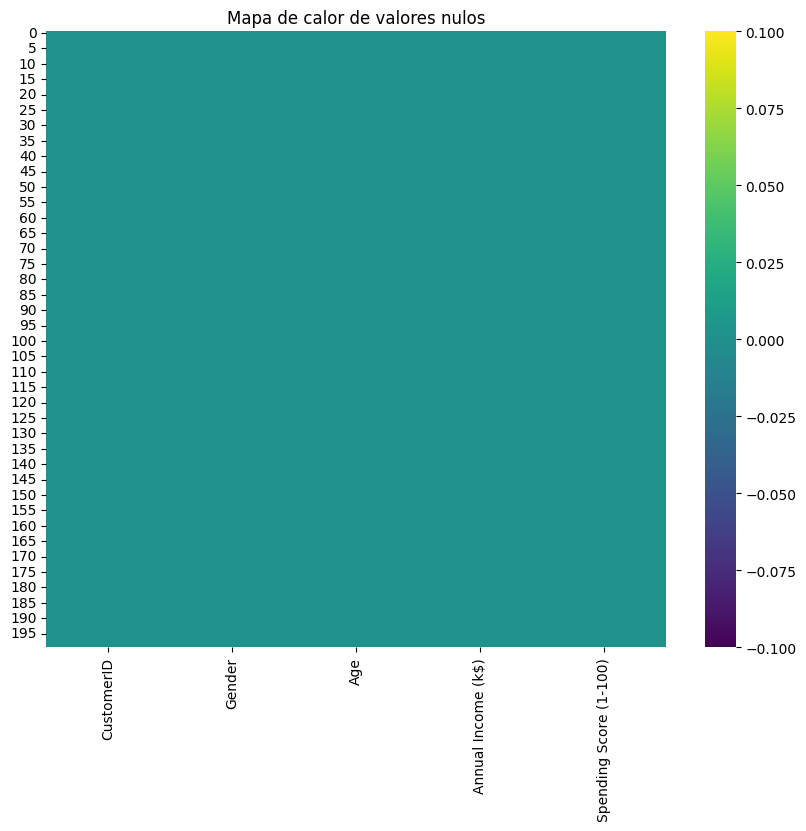

In [4]:
# verificar si faltan datos
# Crear mapa de calor de valores nulos
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

> **Nota:** El dataset está limpio

### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

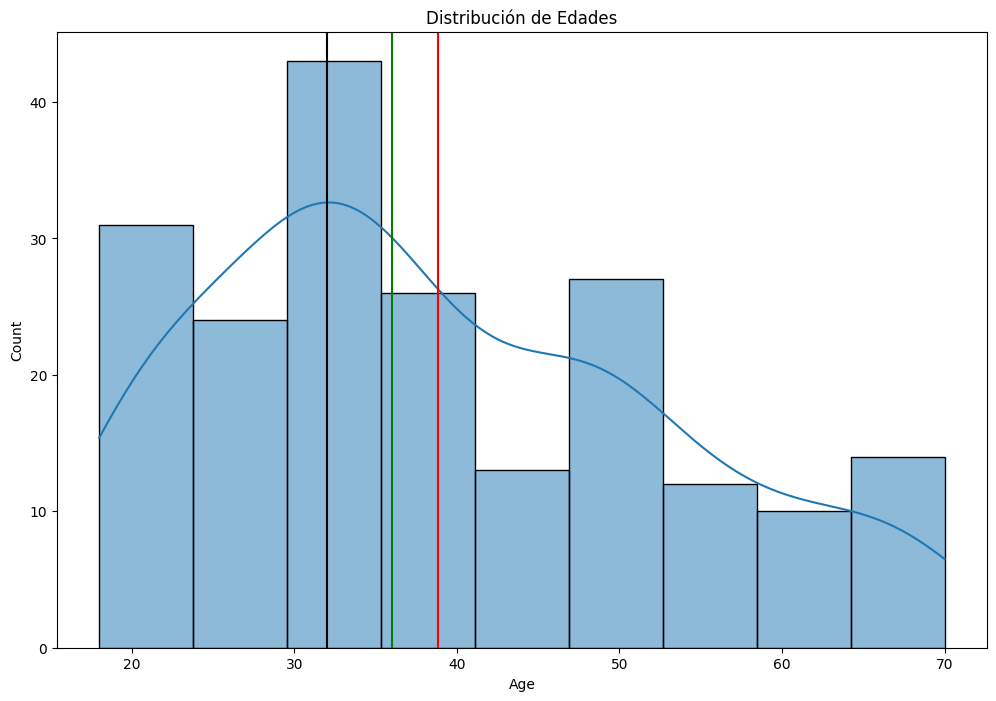

Media: 38.85
Mediana: 36.0
Moda: 32


In [5]:
plt.figure(figsize = (12, 8))

# Grafica de distribución de edades
sns.histplot(df, x = 'Age', kde = True)
plt.title('Distribución de Edades')
plt.axvline(df['Age'].mean(), color = 'red')
plt.axvline(df['Age'].median(), color = 'green')
plt.axvline(df['Age'].mode()[0], color = 'black')
plt.show()

# Calcular medidas de tendencia central e imprimir
print(f"Media: {df['Age'].mean()}")
print(f"Mediana: {df['Age'].median()}")
print(f"Moda: {df['Age'].mode()[0]}")

### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

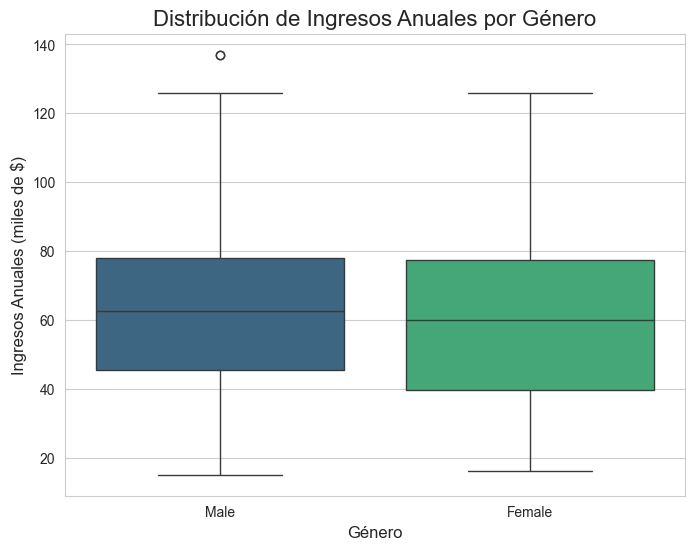

In [6]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='viridis')
plt.title('Distribución de Ingresos Anuales por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ingresos Anuales (miles de $)', fontsize=12)
plt.show()

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

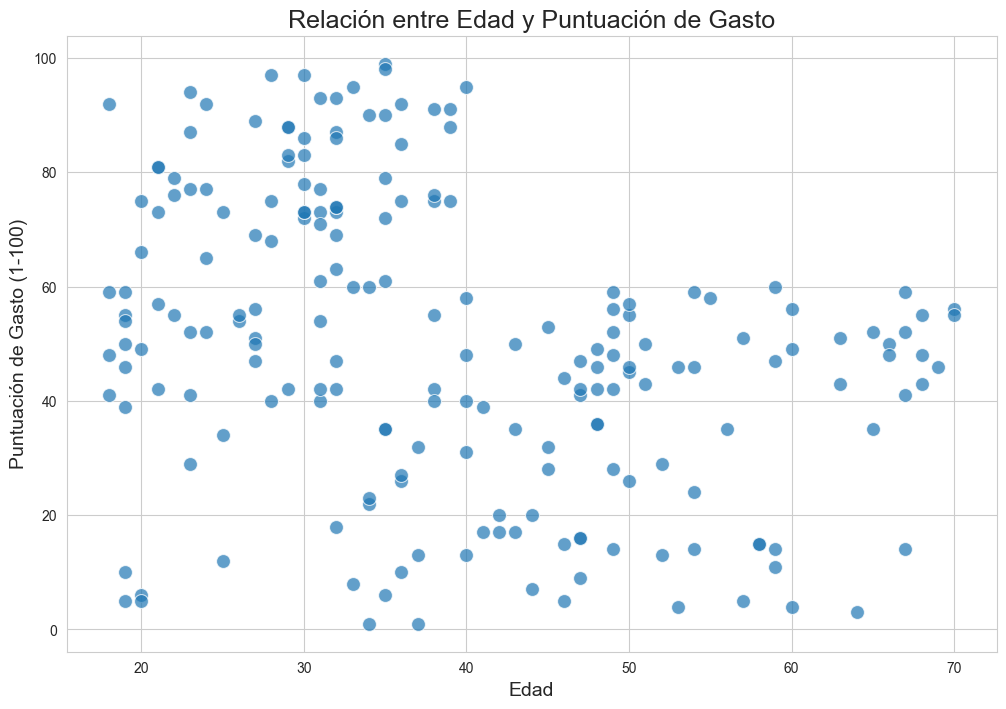

In [8]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, s=100, alpha=0.7)

plt.title('Relación entre Edad y Puntuación de Gasto', fontsize=18)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=14)

plt.show()

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

El coeficiente de correlación entre el Ingreso Anual y la Puntuación de Gasto es: 0.0099


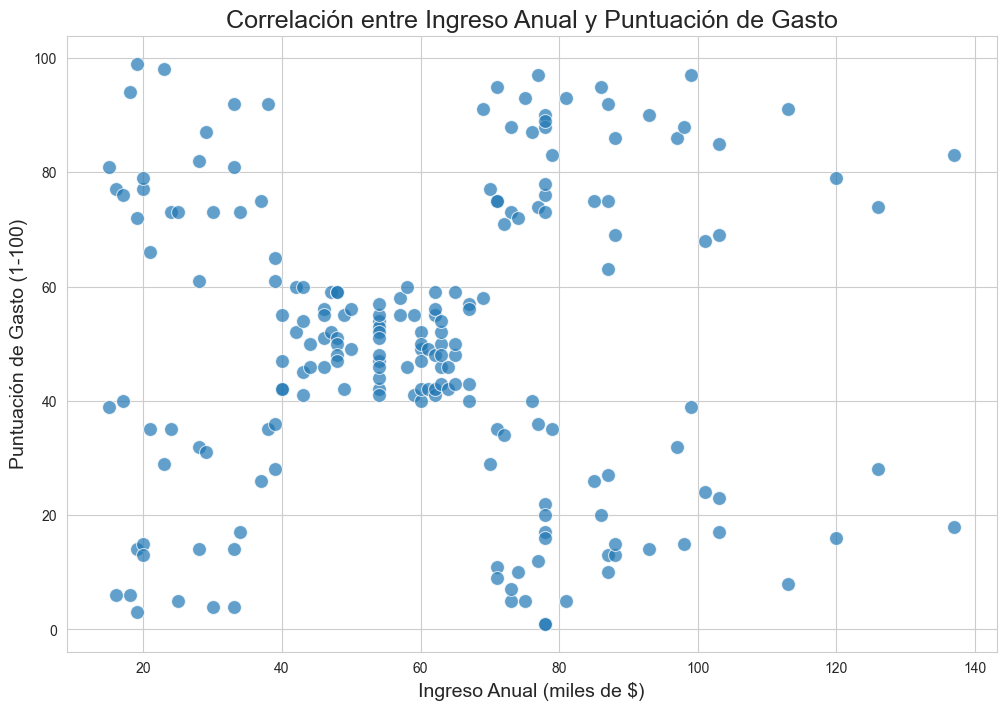

In [10]:
# Calcular el coeficiente de correlación
correlation = df[['Annual Income (k$)', 'Spending Score (1-100)']].corr()
correlation_value = correlation.loc['Annual Income (k$)', 'Spending Score (1-100)']

# Imprimir el resultado de la correlación
print(f"El coeficiente de correlación entre el Ingreso Anual y la Puntuación de Gasto es: {correlation_value:.4f}")

# Crear la gráfica de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=100, alpha=0.7)

# Añadir títulos y etiquetas
plt.title('Correlación entre Ingreso Anual y Puntuación de Gasto', fontsize=18)
plt.xlabel('Ingreso Anual (miles de $)', fontsize=14)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=14)

plt.show()

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

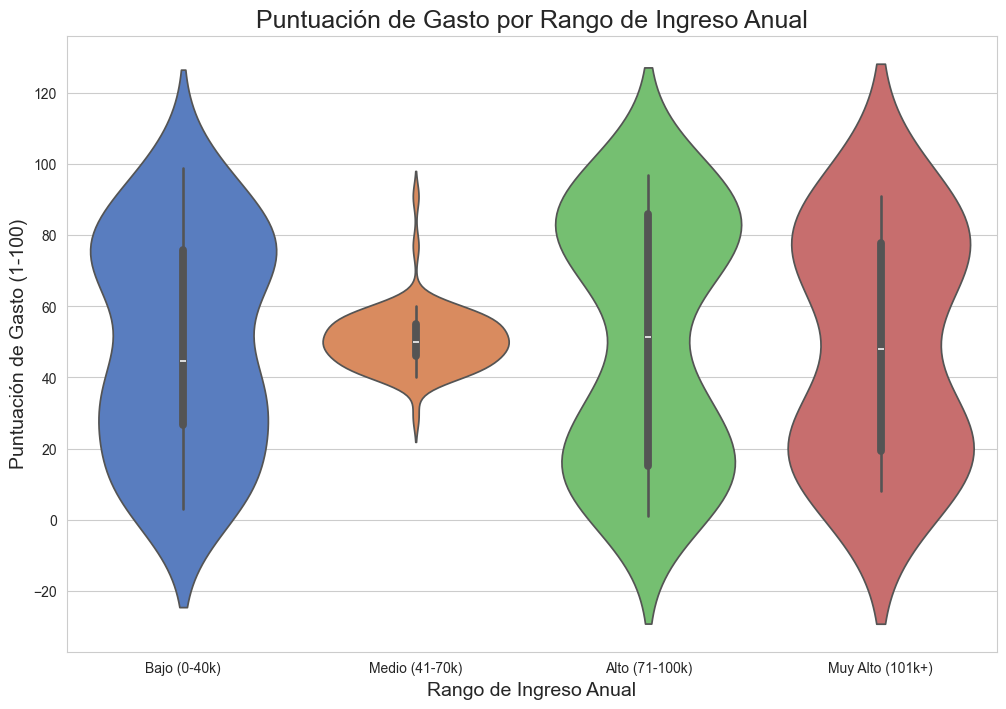

In [11]:
# Crear rangos para el ingreso anual
bins = [0, 40, 70, 100, 140]
labels = ['Bajo (0-40k)', 'Medio (41-70k)', 'Alto (71-100k)', 'Muy Alto (101k+)']
df['Income Group'] = pd.cut(df['Annual Income (k$)'], bins=bins, labels=labels, right=True)

# Crear la gráfica de violín
plt.figure(figsize=(12, 8))
sns.violinplot(x='Income Group', y='Spending Score (1-100)', data=df, palette='muted')

# Añadir títulos y etiquetas
plt.title('Puntuación de Gasto por Rango de Ingreso Anual', fontsize=18)
plt.xlabel('Rango de Ingreso Anual', fontsize=14)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=14)

plt.show()

### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

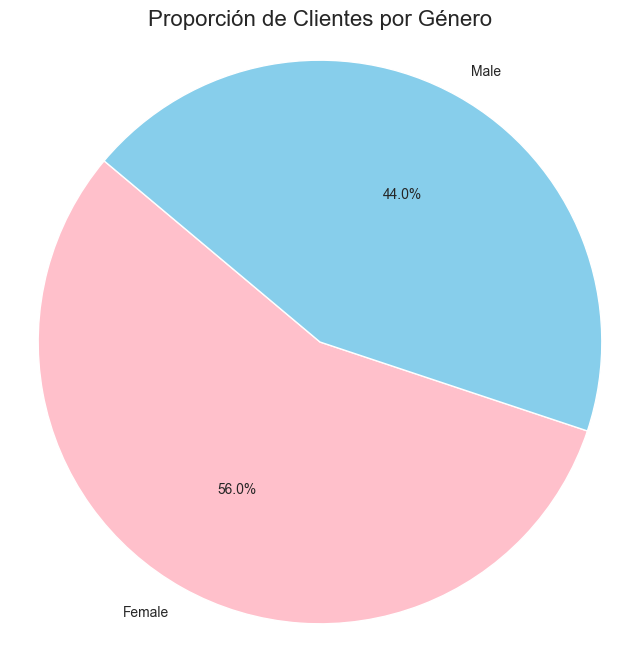

In [12]:
# Contar el número de clientes por género
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))

# Generar el gráfico de pastel
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FFC0CB', '#87CEEB'])

plt.title('Proporción de Clientes por Género', fontsize=16)
plt.axis('equal')
plt.show()

### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

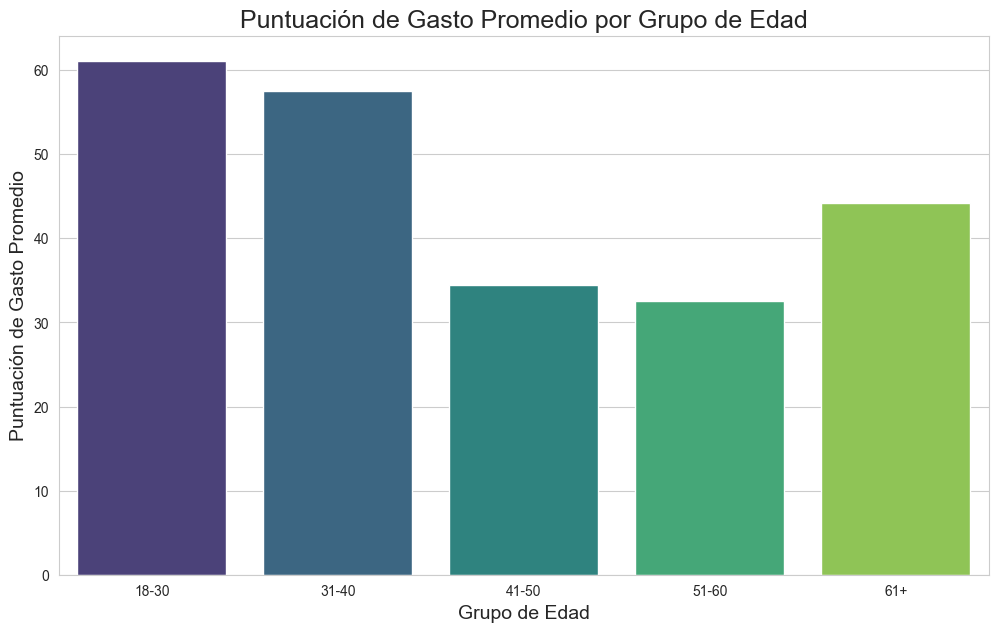

In [13]:
age_bins = [17, 30, 40, 50, 60, 71]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

avg_spending_by_age = df.groupby('Age Group')['Spending Score (1-100)'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Age Group', y='Spending Score (1-100)', data=avg_spending_by_age, palette='viridis')

plt.title('Puntuación de Gasto Promedio por Grupo de Edad', fontsize=18)
plt.xlabel('Grupo de Edad', fontsize=14)
plt.ylabel('Puntuación de Gasto Promedio', fontsize=14)

plt.show()

### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

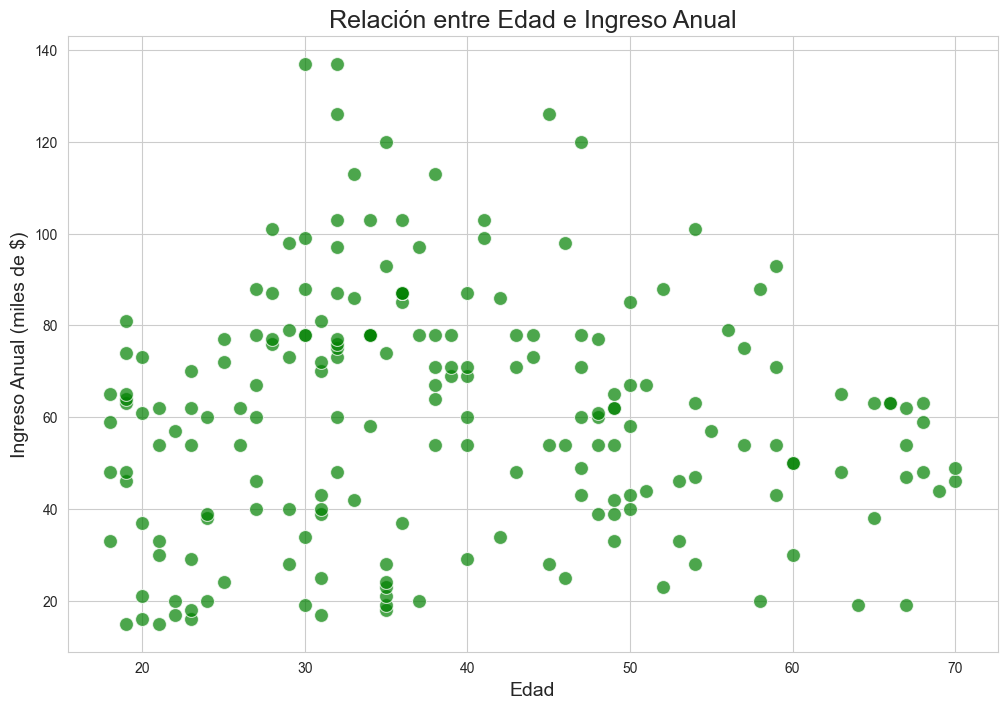

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, s=100, alpha=0.7, color='green')

plt.title('Relación entre Edad e Ingreso Anual', fontsize=18)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Ingreso Anual (miles de $)', fontsize=14)

plt.show()

### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

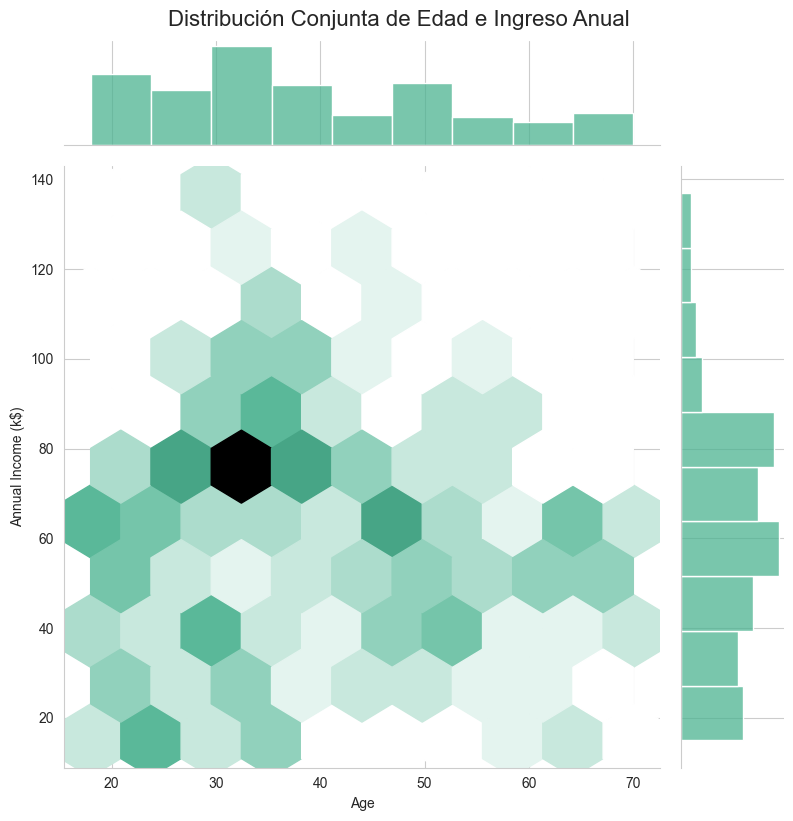

In [15]:
sns.jointplot(x='Age', y='Annual Income (k$)', data=df, kind='hex', height=8, color='#4CB391')
plt.suptitle('Distribución Conjunta de Edad e Ingreso Anual', y=1.02, fontsize=16)
plt.show()

### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

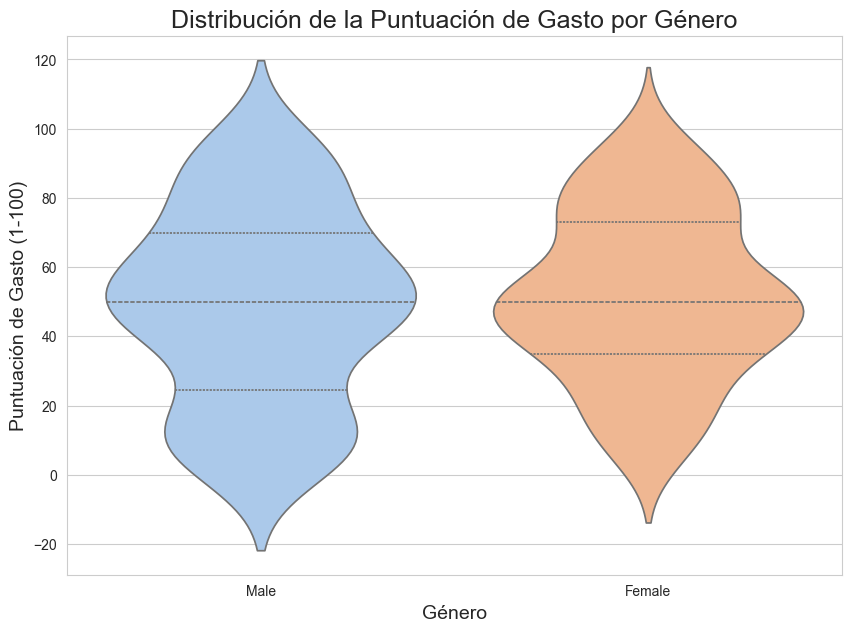

In [16]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, palette='pastel', inner='quartile')

plt.title('Distribución de la Puntuación de Gasto por Género', fontsize=18)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=14)

plt.show()